In [ ]:
!pip install eo-learn -q

     |████████████████████████████████| 69 kB 3.7 MB/s 
     |████████████████████████████████| 10.5 MB 15.6 MB/s 
     |████████████████████████████████| 131 kB 67.2 MB/s 
     |████████████████████████████████| 201 kB 68.7 MB/s 
     |████████████████████████████████| 1.0 MB 64.1 MB/s 
     |████████████████████████████████| 133 kB 59.2 MB/s 
     |████████████████████████████████| 53.8 MB 112 kB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 994 kB 59.0 MB/s 
     |████████████████████████████████| 15.4 MB 24.4 MB/s 
     |████████████████████████████████| 6.3 MB 65.7 MB/s 
     |████████████████████████████████| 3.1 MB 37.3 MB/s 
     |████████████████████████████████| 8.4 MB 44.0 MB/s 
     |████████████████████████████████| 128 kB 48.8 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 127 kB 71.7 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
import cv2
import eolearn
import gdown
from pathlib import Path
import zipfile

from eolearn.core import EOPatch, FeatureType

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive #a
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Гиперпараметры

In [ ]:
TARGET_SIZE = (64, 64)
num_channels = 19
year = 2019

# Загрузка архива

### Разливы

In [ ]:
INPUT_FOLDER =  '/content/drive/MyDrive/colab_files/final/ЦП/files/'

for file_name in os.listdir(INPUT_FOLDER):
    with zipfile.ZipFile(INPUT_FOLDER + file_name) as zip_ref:
        zip_ref.extractall("spills")

### СSV

In [ ]:
file_id = '1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-1tU61PQWnBUSzq526qz1DAVOv4YkPeq'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-63tzsg8CJNnFV981LIn-oW0X8m4pzYP'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-7zTG4SgwvXVAFu9ymzGuRoABYUgfw8T'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-IeklYjpQYNJ5AiljlERYzdMXG9mFFgT'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)
file_id = '1-IeklYjpQYNJ5AiljlERYzdMXG9mFFgT'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU
To: /content/clean_pollution.csv
100%|██████████| 683k/683k [00:00<00:00, 65.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1tU61PQWnBUSzq526qz1DAVOv4YkPeq
To: /content/clean_pollution_w_names_n_idx2020.csv
100%|██████████| 88.0k/88.0k [00:00<00:00, 50.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-63tzsg8CJNnFV981LIn-oW0X8m4pzYP
To: /content/clean_pollution_w_names_n_idx2019.csv
100%|██████████| 256k/256k [00:00<00:00, 52.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7zTG4SgwvXVAFu9ymzGuRoABYUgfw8T
To: /content/clean_pollution_w_names_n_idx2018.csv
100%|██████████| 152k/152k [00:00<00:00, 45.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-IeklYjpQYNJ5AiljlERYzdMXG9mFFgT
To: /content/clean_pollution_w_names_n_idx2017.csv
100%|██████████| 102k/102k [00:00<00:00, 21.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-IeklYjpQYNJ5AiljlERYzd

In [ ]:
file_id = '1-0KypqrB6uoD9xZyYaPGHqQ94hSSW1Mn'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1-0KypqrB6uoD9xZyYaPGHqQ94hSSW1Mn
To: /content/clean_pollution_w_names_n_idx_2021.csv
100%|██████████| 80.1k/80.1k [00:00<00:00, 15.9MB/s]


In [ ]:
file_id = '1EqsaKDXplnGdPG0qaa_JX25qnaHz-Yqb'
gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1EqsaKDXplnGdPG0qaa_JX25qnaHz-Yqb
To: /content/files_pollution.csv
100%|██████████| 7.05M/7.05M [00:00<00:00, 122MB/s]


'files_pollution.csv'

# Сборка датасета

## Функции

In [ ]:
# ЛУК-2020-1	15.0	0,1,2,3,4,

def prepare_batch(filename, id_max, idx):
    proto_idx = tf.make_tensor_proto(idx)
    idx = tf.make_ndarray(proto_idx)
    idx = [int(i) for i in idx[0].decode().split(',')[:-1]]
    lbls = []
    id_max = int(float(id_max))
    for i in range(id_max + 1):
        if i in idx:
            lbls.append(1.)
        else:
            lbls.append(0.)
    return filename, tf.expand_dims(lbls, -1)

prepare_batch(tf.Variable('ЛУК-2020-1'), tf.Variable(['15.0']), tf.Variable(['2,3,4,10,']))

(<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'\xd0\x9b\xd0\xa3\xd0\x9a-2020-1'>,
 <tf.Tensor: shape=(16, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32)>)

In [ ]:
def read_file(item, label, shuffle=True):
    try:
        eopatch = EOPatch.load(item[0].numpy().decode())
        img = eopatch.data['L2A']
        masks = [eopatch.mask[x] for x in eopatch.mask]
        img = np.concatenate([img] + masks, axis=-1)
        # перемешивание примеров внутри батча
        if shuffle:
            idx = np.random.choice(img.shape[0], img.shape[0], replace=False).astype('int')
            img = np.array([img[i] for i in idx])
            label = np.array([label[i] for i in idx])
        return img, label
    except:
        return tf.zeros(shape=(1, 64, 64, 19)), tf.zeros(shape=(1, 1))

In [ ]:
@tf.function()
def augmentation(img, label):
    '''
    Случайное вращение и отражение изображения для аугментации
    '''
    if tf.random.uniform(()) > 0.5:
    # Случайное отражение по горизонтали
        img = tf.image.flip_left_right(img)

    if tf.random.uniform(()) > 0.5:
    # Случайное отражение по вертикали
        img = tf.image.flip_up_down(img)

    if tf.random.uniform(()) > 0.5:
    # Случайное транспонирование
        img = tf.image.transpose(img)

    # if tf.random.uniform(()) > 0.5:
    #     # Вращение
    #     img = rotation(img)

    if tf.random.uniform(()) > 0.1:
    # Зашумление картинки
        img = tf.cast(img, tf.float32) + tf.random.uniform((tf.shape(img)), tf.random.uniform((), .3, .8), 0.99)

    return img, label

## Датасет

In [ ]:
df = pd.read_csv(f'/content/clean_pollution_w_names_n_idx{year}.csv')

df.head()

,Unnamed: 0,cat_pollution,lat,lon,date,cat_ground,square,filename,idx_max,idx,fileme
0,2,нефть,73.347778,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559,ЛУК-КГ-2018-1,23.0,"2,",/2019-01/ЛУК-КГ-2018-1
1,20,"Нефть, нефтепродукты",76.121283,62.083820,2019-03-29 00:00:00,земли лесного фонда,0.0726,ЮС-2018-2,24.0,"2,",/2019-16/ЮС-2018-2
2,21,"Нефть, нефтепродукты",76.121874,62.084043,2019-03-29 00:00:00,земли лесного фонда,0.1013,ЮС-2018-2,24.0,"2,",/2019-16/ЮС-2018-2
3,22,"Нефть, нефтепродукты",76.121199,62.083993,2019-03-29 00:00:00,земли лесного фонда,0.0059,ЮС-2018-2,24.0,"2,",/2019-16/ЮС-2018-2
4,23,"Нефть, нефтепродукты",76.120363,62.083883,2019-03-29 00:00:00,земли лесного фонда,0.0964,ЮС-2018-2,24.0,"2,",/2019-16/ЮС-2018-2


In [ ]:
df_path = pd.read_csv('/content/files_pollution.csv', index_col=0)
df_path.head()

,year,dir,name,date,id_pollution,path
0,2017.0,1,ЛУК-2016-6,2017-02-15 00:00:00,0,2017-01/ЛУК-2016-6
1,2017.0,1,ЛУК-2016-7,2017-02-15 00:00:00,1,2017-01/ЛУК-2016-7
2,2019.0,1,ЛУК-КГ-2018-1,2019-03-04 00:00:00,2,2019-01/ЛУК-КГ-2018-1
3,2021.0,1,ЛУК-КГ-2020-1,2021-02-18 00:00:00,3,2021-01/ЛУК-КГ-2020-1
4,2021.0,1,ЛУК-КГ-2020-2,2021-02-18 00:00:00,4,2021-01/ЛУК-КГ-2020-2


In [ ]:
all_filenames = glob.glob(f'/content/spills/{year}/*/*')

In [ ]:
all_filenames[0]

'/content/spills/2019/2019-12/РН-ЮНГ-2015-222'

In [ ]:
len(all_filenames)

3813

In [ ]:
data_names = []
data_idx = []
data_idx_max = []

for i in range(len(df)):
    filename = df.iloc[i]['filename']
    idx = df.iloc[i]['idx']
    idx_max = df.iloc[i]['idx_max']

    for name in all_filenames:
        if filename + ' ' in name + ' ':
            data_names.append(name)
            data_idx.append(idx)
            data_idx_max.append(idx_max)

In [ ]:
len(data_names), len(data_idx), len(data_idx_max)

(1170, 1170, 1170)

In [ ]:
np.random.seed(0)
idx_split = np.arange(len(data_names))
np.random.shuffle(idx_split)
train_split = idx_split[150:]
val_split = idx_split[:150]

data_names = np.array(data_names)
data_idx = np.array(data_idx)
data_idx_max = np.array(data_idx_max)

print("train:", len(data_names[train_split]))
print("val:", len(data_names[val_split]))


dataset_names = tf.data.Dataset.from_tensor_slices(data_names[train_split])
dataset_idx = tf.data.Dataset.from_tensor_slices(data_idx[train_split])
dataset_idx_max = tf.data.Dataset.from_tensor_slices(data_idx_max[train_split])

val_dataset_names = tf.data.Dataset.from_tensor_slices(data_names[val_split])
val_dataset_idx = tf.data.Dataset.from_tensor_slices(data_idx[val_split])
val_dataset_idx_max = tf.data.Dataset.from_tensor_slices(data_idx_max[val_split])

dataset = tf.data.Dataset.zip((dataset_names, dataset_idx_max, dataset_idx)).shuffle(512).batch(1)
val_dataset = tf.data.Dataset.zip((val_dataset_names, val_dataset_idx_max, val_dataset_idx)).shuffle(512).batch(1)

# prepare_batch(filename, id_max, idx)
dataset = dataset.map(
        lambda filename, id_max, idx: tuple(tf.py_function(prepare_batch,
                                                            [filename, id_max, idx], 
                                                            [tf.string, tf.float32])))
val_dataset = val_dataset.map(
        lambda filename, id_max, idx: tuple(tf.py_function(prepare_batch,
                                                            [filename, id_max, idx], 
                                                            [tf.string, tf.float32])))

# функция подгрузки изображений
dataset = dataset.map(
        lambda item, label: tuple(tf.py_function(read_file, [item, label], [tf.float32, tf.float32])))
val_dataset = val_dataset.map(
        lambda item, label: tuple(tf.py_function(read_file, [item, label], [tf.float32, tf.float32])))

# функция аугментации изображений
dataset = dataset.map(augmentation, num_parallel_calls=tf.data.AUTOTUNE)

for i, batch in enumerate(val_dataset):
    print(len(batch))
    print(batch[0].shape)
    print(batch[1].shape)
    if i > 4:
        break

train: 1020
val: 150
2
(1, 64, 64, 19)
(1, 1)
2
(23, 64, 64, 19)
(23, 1)
2
(20, 64, 64, 19)
(20, 1)
2
(18, 64, 64, 19)
(18, 1)
2
(25, 64, 64, 19)
(25, 1)
2
(23, 64, 64, 19)
(23, 1)


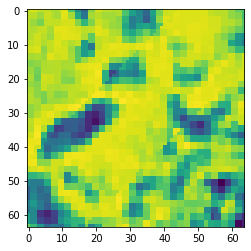

In [ ]:
plt.imshow(batch[0][0, ..., 4])
plt.show()

In [ ]:
# model(batch[0], training=False)

In [ ]:
# x, y = batch
# with tf.GradientTape() as tape:
#     y_pred = model(x, training=True)  # Forward pass
#     # Compute the loss value
#     # (the loss function is configured in `compile()`)
#     loss = tf.keras.losses.binary_crossentropy(y, y_pred)
#     print(loss)


# NN

In [ ]:
class GCAdam(tf.keras.optimizers.Adam):
    def get_gradients(self, loss, params):
        '''
        Оптимизатор для централизации градиента, ускоряющий процесс обучения
        '''
        grads = []
        gradients = super().get_gradients()
        for grad in gradients:
            grad_len = len(grad.shape)
            if grad_len > 1:
                axis = list(range(grad_len - 1))
                grad -= tf.reduce_mean(grad, axis=axis, keep_dims=True)
            grads.append(grad)

        return grads

class Schedule():
    '''
    Расписание уменьшения шага обучения для коллбэка
    Уменьшение начинается co start_epoch и происходит каждые per_epoch
    '''
    def __init__(self, start_epoch=5, per_epoch=1):
        self.start_epoch = start_epoch
        self.per_epoch = per_epoch

    def __call__(self, epoch, lr):
        if epoch >= self.start_epoch and epoch % self.per_epoch == 0:
            lr *= tf.math.exp(-0.1)
        print('learning rate:', float(lr))
        return lr

class CustomModel(keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        try:
            with tf.GradientTape() as tape:
                y_pred = self(x, training=True)  # Forward pass
                # Compute the loss value
                # (the loss function is configured in `compile()`)
                loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        except:
            pass
            
        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

### Simple test nn

In [ ]:
inputs = layers.Input((64, 64, 19))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, strides=2, activation='relu')(x)
x = layers.Conv2D(32, 2, activation='relu')(x)
x = layers.Conv2D(32, 2, strides=2, activation='relu')(x)
x = layers.Conv2D(32, 2, activation='relu')(x)
x = layers.Conv2D(32, 2, strides=2, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(512)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(name="accuracy")
    ],
)


In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 64, 64, 19)]      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 62, 62, 32)        5504      
                                                                 
 conv2d_45 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 conv2d_46 (Conv2D)          (None, 29, 29, 32)        4128      
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 32)        4128      
                                                                 
 conv2d_48 (Conv2D)          (None, 13, 13, 32)        4128      
                                                                 
 conv2d_49 (Conv2D)          (None, 6, 6, 32)          412

In [ ]:
history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=5,
)

Epoch 1/5


NotFoundError: ignored

In [ ]:
model.evaluate(val_dataset)

## CCT

### Гиперпараметры

In [ ]:
positional_emb = True
conv_layers = 2
projection_dim = 128

num_heads = 2
transformer_units = [
    projection_dim,
    projection_dim,
]
transformer_layers = 2
stochastic_depth_rate = 0.1

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 30
image_size = 64
input_shape = [64, 64, 19]

### Токенайзер

In [ ]:

class CCTTokenizer(layers.Layer):
    def __init__(
        self,
        kernel_size=3,
        stride=1,
        padding=1,
        pooling_kernel_size=3,
        pooling_stride=2,
        num_conv_layers=conv_layers,
        num_output_channels=[64, 128],
        positional_emb=positional_emb,
        **kwargs,
    ):
        super(CCTTokenizer, self).__init__(**kwargs)

        self.conv_model = keras.Sequential()
        for i in range(num_conv_layers):
            self.conv_model.add(
                layers.Conv2D(
                    num_output_channels[i],
                    kernel_size,
                    stride,
                    padding="valid",
                    use_bias=False,
                    activation="relu",
                    kernel_initializer="he_normal",
                )
            )
            self.conv_model.add(layers.ZeroPadding2D(padding))
            self.conv_model.add(
                layers.MaxPool2D(pooling_kernel_size, pooling_stride, "same")
            )

        self.positional_emb = positional_emb

    def call(self, images):
        outputs = self.conv_model(images)
        # После прохождения данной мини-сетки изображение превращается в ряд последовательностей
        reshaped = tf.reshape(
            outputs,
            (-1, tf.shape(outputs)[1] * tf.shape(outputs)[2], tf.shape(outputs)[-1]),
        )
        return reshaped

    def positional_embedding(self, image_size):
        # Опциональная часть с позиционным эмбеддингом
        if self.positional_emb:
            dummy_inputs = tf.ones((1, image_size, image_size, num_channels))
            dummy_outputs = self.call(dummy_inputs)
            sequence_length = tf.shape(dummy_outputs)[1]
            projection_dim = tf.shape(dummy_outputs)[-1]

            embed_layer = layers.Embedding(
                input_dim=sequence_length, output_dim=projection_dim
            )
            return embed_layer, sequence_length
        else:
            return None


### Stochastic depth

[Stochastic depth](https://arxiv.org/abs/1603.09382) -
техника регуляризации, которая случайным образом блокирует работу некоторых слоев нейросети. По смыслу близка к "дропауту" - [Dropout](https://jmlr.org/papers/v15/srivastava14a.html), с той разницей, что дропаут блокирует отдельные нейроны.

In [ ]:
# Источник: github.com:rwightman/pytorch-image-models.
class StochasticDepth(layers.Layer):
    def __init__(self, drop_prop, **kwargs):
        super(StochasticDepth, self).__init__(**kwargs)
        self.drop_prob = drop_prop

    def call(self, x, training=None):
        if training:
            keep_prob = 1 - self.drop_prob
            shape = (tf.shape(x)[0],) + (1,) * (len(tf.shape(x)) - 1)
            random_tensor = keep_prob + tf.random.uniform(shape, 0, 1)
            random_tensor = tf.floor(random_tensor)
            return (x / keep_prob) * random_tensor
        return x


### multilayer perceptron (MLP) для энкодера трансформера

In [ ]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


### Финальная сборка модели

In [ ]:

def create_cct_model(
    input_shape=input_shape,
    image_size=image_size,
    num_heads=num_heads,
    projection_dim=projection_dim,
    transformer_units=transformer_units,
):

    inputs = layers.Input(input_shape)

    # Кодирование (нарезка) патчей.
    cct_tokenizer = CCTTokenizer()
    encoded_patches = cct_tokenizer(inputs)

    # Применение позиционного эмбеддинга.

    # Stochastic Depth
    dpr = [x for x in np.linspace(0, stochastic_depth_rate, transformer_layers)]

    # Блоки трансформера.
    for i in range(transformer_layers):
        # Нормализация.
        x1 = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)

        # Self-Attention-блок.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip-connection.
        attention_output = StochasticDepth(dpr[i])(attention_output)
        x2 = layers.Add()([attention_output, encoded_patches])

        # Нормализация.
        x3 = layers.LayerNormalization(epsilon=1e-5)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        # Skip-connection.
        x3 = StochasticDepth(dpr[i])(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Применение sequence pooling для получения взвешенного выхода сети.
    representation = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)
    attention_weights = tf.nn.softmax(layers.Dense(1,)(representation), axis=1)
    weighted_representation = tf.matmul(
        attention_weights, representation, transpose_a=True
    )
    weighted_representation = tf.squeeze(weighted_representation, -2)

    # Выход классификатора.
    logits = layers.Dense(1,  activation='sigmoid')(weighted_representation)
    # Готовая модель
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


## Обучение

In [ ]:
model = create_cct_model(input_shape = [64, 64, 19])

In [ ]:
optimizer = GCAdam(learning_rate=0.0001)
schedule_callback = tf.keras.callbacks.LearningRateScheduler(Schedule(5, 1))
callbacks = [schedule_callback]

model.compile(
    optimizer=optimizer,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(name="accuracy")
    ],
)


In [ ]:
model.load_weights('CCT.h5')

In [ ]:
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 64, 64, 19)  0           []                               
                                ]                                                                 
                                                                                                  
 cct_tokenizer_15 (CCTTokenizer  (None, 256, 128)    84672       ['input_28[0][0]']               
 )                                                                                                
                                                                                                  
 layer_normalization_75 (LayerN  (None, 256, 128)    256         ['cct_tokenizer_15[0][0]']       
 ormalization)                                                                             

In [ ]:
# слои дополнительной аугментации
data_augmentation = keras.Sequential(
    [
        # Случайная обрезка
        layers.RandomCrop(image_size, image_size),
        # Случайное cмещение с отражением
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        # Случайные перепады контрасности
        layers.RandomContrast(factor=0.1),
        # Случайное вращение
        layers.RandomRotation(0.007),
    ],
    name="data_augmentation",
)

inputs = layers.Input((64, 64, 19))
aug = data_augmentation(inputs)
outputs = model(aug)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=optimizer,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(name="accuracy")
    ],
)

In [ ]:
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 64, 64, 19)]      0         
                                                                 
 data_augmentation (Sequenti  (None, 64, 64, 19)       0         
 al)                                                             
                                                                 
 model_17 (Functional)       (None, 1)                 416194    
                                                                 
Total params: 416,194
Trainable params: 416,194
Non-trainable params: 0
_________________________________________________________________


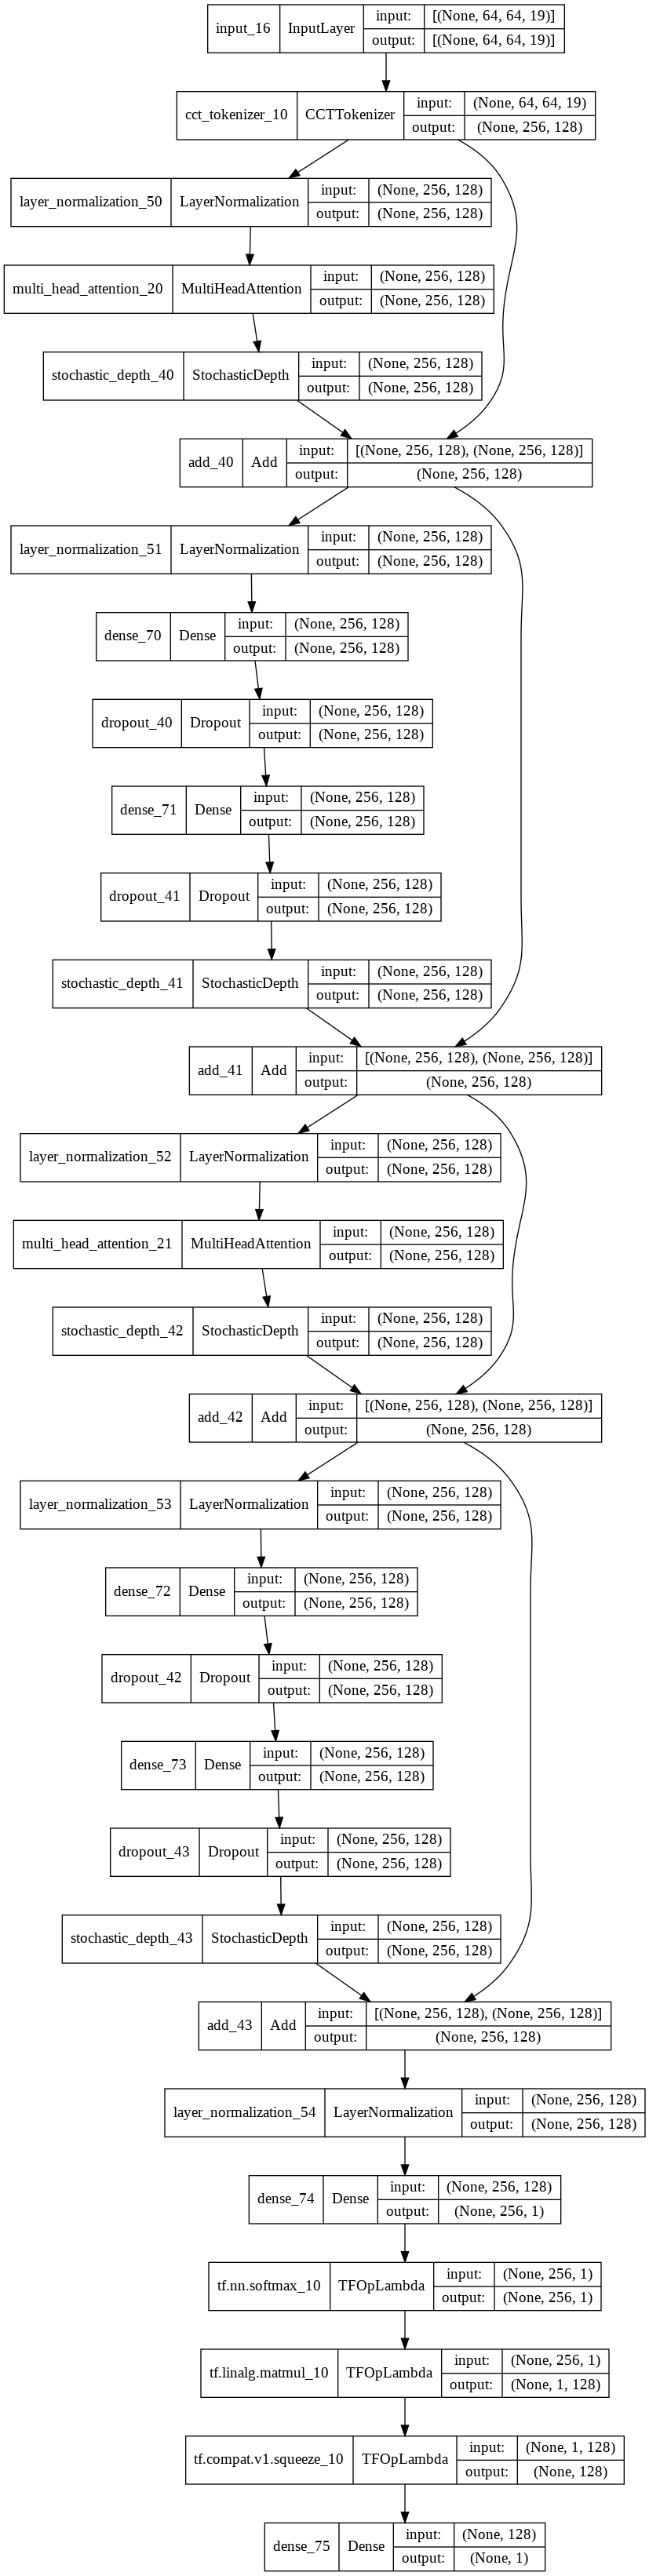

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=callbacks
)

learning rate: 9.999999747378752e-05
Epoch 1/30
641/641 [==============================] - 66s 96ms/step - loss: 0.3352 - accuracy: 0.8213 - val_loss: 0.3169 - val_accuracy: 0.8144 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 2/30
641/641 [==============================] - 60s 94ms/step - loss: 0.3192 - accuracy: 0.8248 - val_loss: 0.3002 - val_accuracy: 0.8360 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 3/30
641/641 [==============================] - 66s 104ms/step - loss: 0.3093 - accuracy: 0.8349 - val_loss: 0.2909 - val_accuracy: 0.8396 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 4/30
641/641 [==============================] - 60s 94ms/step - loss: 0.3035 - accuracy: 0.8383 - val_loss: 0.2985 - val_accuracy: 0.8324 - lr: 1.0000e-04
learning rate: 9.999999747378752e-05
Epoch 5/30
641/641 [==============================] - 60s 93ms/step - loss: 0.2948 - accuracy: 0.8412 - val_loss: 0.2883 - val_accuracy: 0.8414 - lr: 1.0000e-04
learning 

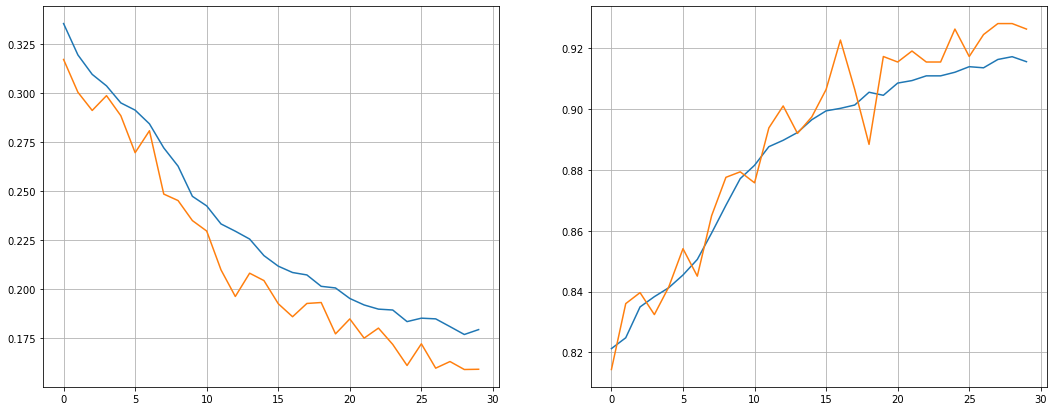

In [ ]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Crossentropy')
plt.plot(history.history['val_loss'], label='Val Crossentropy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.grid()
plt.show()

In [ ]:
model.save_weights('CCT.h5')

### После дальнейшего обучения на всем датасете в течении более 50 эпох

In [ ]:
history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=7,
    callbacks=callbacks
)

learning rate: 9.999999747378752e-06
Epoch 1/7
1140/1140 [==============================] - 114s 95ms/step - loss: 0.1656 - accuracy: 0.9316 - val_loss: 0.1918 - val_accuracy: 0.9290 - lr: 1.0000e-05
learning rate: 9.048373613040894e-06
Epoch 2/7
1140/1140 [==============================] - 107s 94ms/step - loss: 0.1578 - accuracy: 0.9405 - val_loss: 0.1894 - val_accuracy: 0.9271 - lr: 9.0484e-06
learning rate: 8.187306775653269e-06
Epoch 3/7
1140/1140 [==============================] - 108s 95ms/step - loss: 0.1548 - accuracy: 0.9413 - val_loss: 0.1866 - val_accuracy: 0.9271 - lr: 8.1873e-06
learning rate: 7.408181318169227e-06
Epoch 4/7
1140/1140 [==============================] - 109s 95ms/step - loss: 0.1527 - accuracy: 0.9422 - val_loss: 0.1853 - val_accuracy: 0.9290 - lr: 7.4082e-06
learning rate: 6.703199233015766e-06
Epoch 5/7
1140/1140 [==============================] - 107s 94ms/step - loss: 0.1513 - accuracy: 0.9427 - val_loss: 0.1834 - val_accuracy: 0.9290 - lr: 6.7032e-06


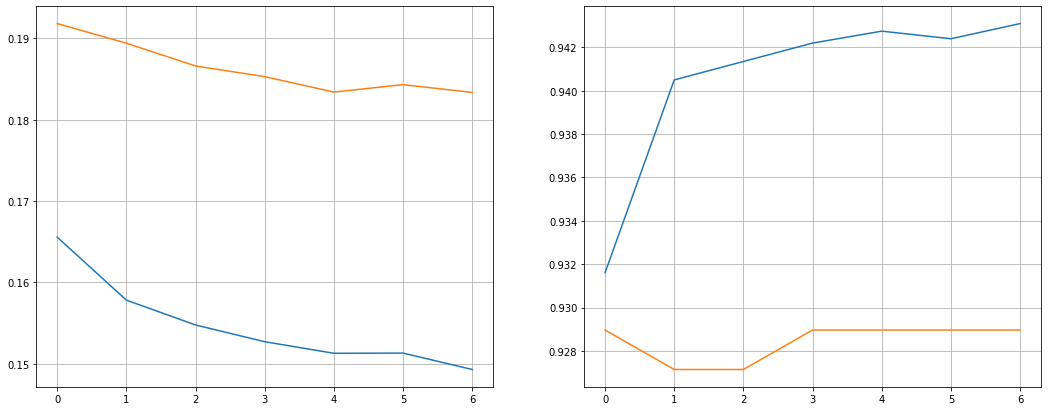

In [ ]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Crossentropy')
plt.plot(history.history['val_loss'], label='Val Crossentropy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.grid()
plt.show()